# ****Tracing Ottoman Emperors Through Text Analytics: A Historical Expedition Using Natural Language Processing (NLP)

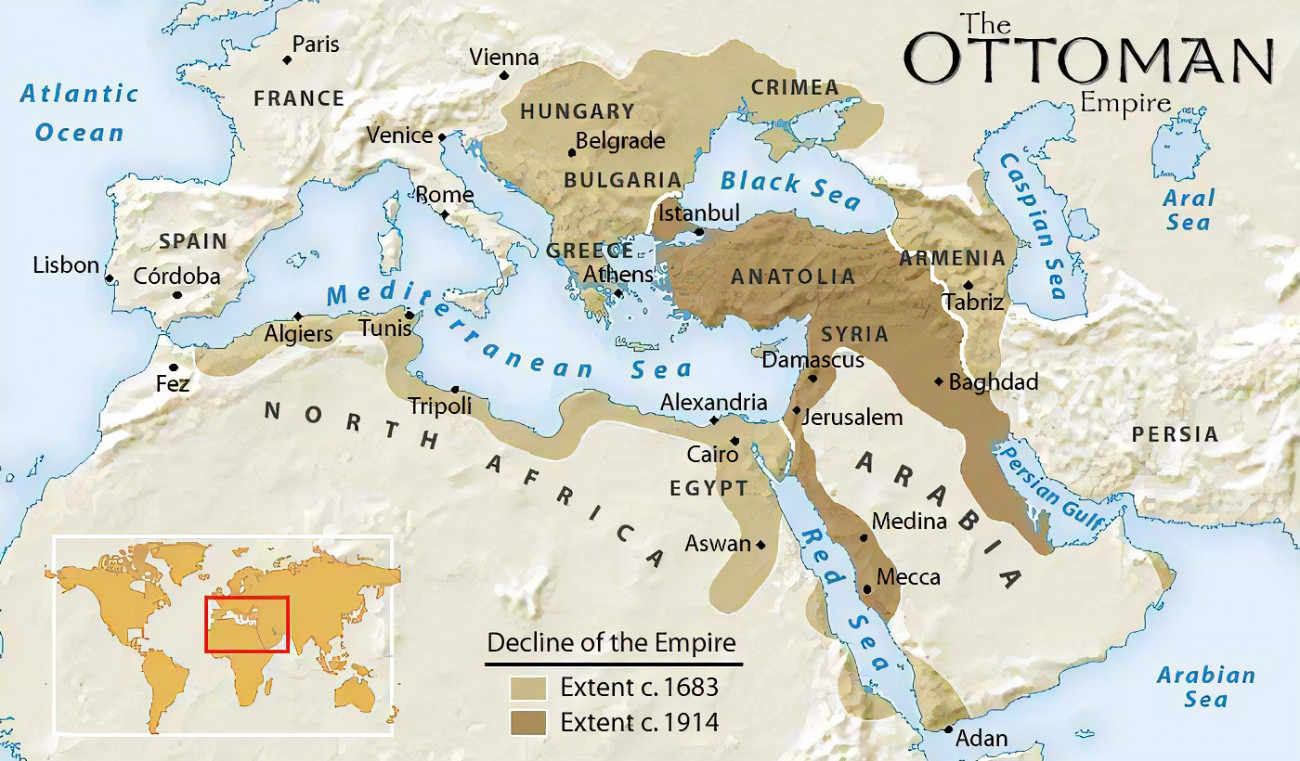

### Introduction:
The "NLP-Driven Exploration of Ottoman Trade Route" is a comprehensive endeavor aimed at unearthing historical insights related to the Ottoman trade routes using advanced Natural Language Processing (NLP) techniques. The primary data source for this project is the esteemed book, "The Ottoman Turks and the Routes of Oriental Trade." Our goal is to extract and analyze names associated with historical contexts, thereby shedding light on the remarkable trade routes of the Ottoman Empire.

### Project Objectives:

 - **Textual Analysis:** The project starts with in-depth textual analysis of the book, focusing on the descriptions and narratives that refer to historical figures, locations, and trade routes.

 - **Entity Recognition:** Using NLP tools and techniques, we identify and extract entities within the text, particularly focusing on names (e.g., people, places) relevant to Ottoman trade history.

 - **Relation Extraction:** The project explores relationships among entities by determining how they are connected within the context of the Ottoman trade routes.

 - **Visual Representation:** We create Wordcloud graphs and data visualizations to illustrate the connections and relationships among historical figures and trade locations

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import torch
import spacy
import nltk
from sklearn.preprocessing import LabelEncoder
from scipy.stats import norm
from nltk.stem import PorterStemmer
from collections import Counter
from spacy import displacy
from wordcloud import WordCloud

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score, auc
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.linear_model import LogisticRegression

In [35]:
with open("ottoman.txt", 'r', encoding='latin1') as f:
    text = f.read()
    print(text)

ï»¿








_The Ottoman Turks and the Routes of Oriental Trade_


Within a period of a little more than two hundred years, from the close
of the thirteenth century to the second decade of the sixteenth, the
rising power of the Ottoman Turks extended the area of its political
control until its holdings stretched north and south across the Levant
from the Russian steppes to the Sudanese desert. The Turkish lands thus
came to intercept all the great routes which in ancient and medieval
times had borne the trade between East and West. Near the time when
the Turkish control became complete, a new way was discovered, passing
around Africa; and within a few years the larger part of the through
trade between Europe and Asia had deserted the Levantine routes and
begun to follow that round the Cape of Good Hope. The causes of this
diversion of trade have not been fully agreed upon. No specific
investigation of the subject appears to have been made. A glance
through works which, being mainly con

In [36]:
chars = sorted(set(text))
print(chars)

['\n', ' ', '(', ')', ',', '-', '.', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', ':', ';', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'R', 'S', 'T', 'U', 'V', 'W', '[', ']', '_', 'a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', '\x80', '\x98', '\x99', '»', '¿', 'â', 'ï']


In [37]:
#Using Character Level Tokenizer
  
string_to_int = {char: i for i,char in enumerate(chars)}
int_to_string = {i: char for i,char in enumerate(chars)}
encode = lambda s: [string_to_int[c] for c in s]
decode = lambda l: ''.join([int_to_string[i] for i in l])

encoded_text = encode(text)
decoded_text = decode(encoded_text)

print(encoded_text)
print(decoded_text)

[76, 73, 74, 0, 0, 0, 0, 0, 0, 0, 0, 0, 43, 37, 51, 48, 1, 33, 63, 63, 58, 56, 44, 57, 1, 37, 64, 61, 54, 62, 1, 44, 57, 47, 1, 63, 51, 48, 1, 35, 58, 64, 63, 48, 62, 1, 58, 49, 1, 33, 61, 52, 48, 57, 63, 44, 55, 1, 37, 61, 44, 47, 48, 43, 0, 0, 0, 40, 52, 63, 51, 52, 57, 1, 44, 1, 59, 48, 61, 52, 58, 47, 1, 58, 49, 1, 44, 1, 55, 52, 63, 63, 55, 48, 1, 56, 58, 61, 48, 1, 63, 51, 44, 57, 1, 63, 66, 58, 1, 51, 64, 57, 47, 61, 48, 47, 1, 68, 48, 44, 61, 62, 4, 1, 49, 61, 58, 56, 1, 63, 51, 48, 1, 46, 55, 58, 62, 48, 0, 58, 49, 1, 63, 51, 48, 1, 63, 51, 52, 61, 63, 48, 48, 57, 63, 51, 1, 46, 48, 57, 63, 64, 61, 68, 1, 63, 58, 1, 63, 51, 48, 1, 62, 48, 46, 58, 57, 47, 1, 47, 48, 46, 44, 47, 48, 1, 58, 49, 1, 63, 51, 48, 1, 62, 52, 67, 63, 48, 48, 57, 63, 51, 4, 1, 63, 51, 48, 0, 61, 52, 62, 52, 57, 50, 1, 59, 58, 66, 48, 61, 1, 58, 49, 1, 63, 51, 48, 1, 33, 63, 63, 58, 56, 44, 57, 1, 37, 64, 61, 54, 62, 1, 48, 67, 63, 48, 57, 47, 48, 47, 1, 63, 51, 48, 1, 44, 61, 48, 44, 1, 58, 49, 1, 52, 6

In [38]:
data = torch.tensor(encode(text), dtype=torch.long)
print(data[:1000])

tensor([76, 73, 74,  0,  0,  0,  0,  0,  0,  0,  0,  0, 43, 37, 51, 48,  1, 33,
        63, 63, 58, 56, 44, 57,  1, 37, 64, 61, 54, 62,  1, 44, 57, 47,  1, 63,
        51, 48,  1, 35, 58, 64, 63, 48, 62,  1, 58, 49,  1, 33, 61, 52, 48, 57,
        63, 44, 55,  1, 37, 61, 44, 47, 48, 43,  0,  0,  0, 40, 52, 63, 51, 52,
        57,  1, 44,  1, 59, 48, 61, 52, 58, 47,  1, 58, 49,  1, 44,  1, 55, 52,
        63, 63, 55, 48,  1, 56, 58, 61, 48,  1, 63, 51, 44, 57,  1, 63, 66, 58,
         1, 51, 64, 57, 47, 61, 48, 47,  1, 68, 48, 44, 61, 62,  4,  1, 49, 61,
        58, 56,  1, 63, 51, 48,  1, 46, 55, 58, 62, 48,  0, 58, 49,  1, 63, 51,
        48,  1, 63, 51, 52, 61, 63, 48, 48, 57, 63, 51,  1, 46, 48, 57, 63, 64,
        61, 68,  1, 63, 58,  1, 63, 51, 48,  1, 62, 48, 46, 58, 57, 47,  1, 47,
        48, 46, 44, 47, 48,  1, 58, 49,  1, 63, 51, 48,  1, 62, 52, 67, 63, 48,
        48, 57, 63, 51,  4,  1, 63, 51, 48,  0, 61, 52, 62, 52, 57, 50,  1, 59,
        58, 66, 48, 61,  1, 58, 49,  1, 

In [39]:
# Validation and Training Split

In [40]:
n = int(0.8*len(data))
train_data = data[:n]
val_data = data[n:]

In [41]:
block_size = 200

x = train_data[:block_size]
y = train_data[1:block_size+1]

for t in range(block_size):
    context = x[:t+1]
    target = y[t]
    print('when input is', context, 'target is', target)

when input is tensor([76]) target is tensor(73)
when input is tensor([76, 73]) target is tensor(74)
when input is tensor([76, 73, 74]) target is tensor(0)
when input is tensor([76, 73, 74,  0]) target is tensor(0)
when input is tensor([76, 73, 74,  0,  0]) target is tensor(0)
when input is tensor([76, 73, 74,  0,  0,  0]) target is tensor(0)
when input is tensor([76, 73, 74,  0,  0,  0,  0]) target is tensor(0)
when input is tensor([76, 73, 74,  0,  0,  0,  0,  0]) target is tensor(0)
when input is tensor([76, 73, 74,  0,  0,  0,  0,  0,  0]) target is tensor(0)
when input is tensor([76, 73, 74,  0,  0,  0,  0,  0,  0,  0]) target is tensor(0)
when input is tensor([76, 73, 74,  0,  0,  0,  0,  0,  0,  0,  0]) target is tensor(0)
when input is tensor([76, 73, 74,  0,  0,  0,  0,  0,  0,  0,  0,  0]) target is tensor(43)
when input is tensor([76, 73, 74,  0,  0,  0,  0,  0,  0,  0,  0,  0, 43]) target is tensor(37)
when input is tensor([76, 73, 74,  0,  0,  0,  0,  0,  0,  0,  0,  0, 43,

In [42]:
nlp_core_web_sm = spacy.load('en_core_web_sm')

# Process the text with the loaded spaCy model
doc = nlp_core_web_sm(text)   
# Print the pipeline components of the 'en_core_web_sm' model
print(nlp_core_web_sm.pipeline)

for token in doc:
    print(token)


[('tok2vec', <spacy.pipeline.tok2vec.Tok2Vec object at 0x000002422AE41600>), ('tagger', <spacy.pipeline.tagger.Tagger object at 0x00000242319EC700>), ('parser', <spacy.pipeline.dep_parser.DependencyParser object at 0x0000024231998C10>), ('attribute_ruler', <spacy.pipeline.attributeruler.AttributeRuler object at 0x00000242319C82C0>), ('lemmatizer', <spacy.lang.en.lemmatizer.EnglishLemmatizer object at 0x000002423905B680>), ('ner', <spacy.pipeline.ner.EntityRecognizer object at 0x0000024231998890>)]
ï
»
¿










_
The
Ottoman
Turks
and
the
Routes
of
Oriental
Trade
_




Within
a
period
of
a
little
more
than
two
hundred
years
,
from
the
close


of
the
thirteenth
century
to
the
second
decade
of
the
sixteenth
,
the


rising
power
of
the
Ottoman
Turks
extended
the
area
of
its
political


control
until
its
holdings
stretched
north
and
south
across
the
Levant


from
the
Russian
steppes
to
the
Sudanese
desert
.
The
Turkish
lands
thus


came
to
intercept
all
the
great
routes
which
in
ancient


In [43]:
for token in doc:
    print(token.text, token.pos_, token.dep_)

ï X ROOT
» NOUN ROOT
¿ PROPN appos









 SPACE dep
_ PUNCT punct
The DET det
Ottoman PROPN compound
Turks PROPN nsubj
and CCONJ cc
the DET det
Routes PROPN conj
of ADP prep
Oriental PROPN compound
Trade PROPN pobj
_ NOUN conj



 SPACE dep
Within ADP prep
a DET det
period NOUN pobj
of ADP prep
a DET det
little ADJ amod
more ADJ amod
than ADP quantmod
two NUM compound
hundred NUM nummod
years NOUN pobj
, PUNCT punct
from ADP prep
the DET det
close NOUN pobj

 SPACE dep
of ADP prep
the DET det
thirteenth ADJ amod
century NOUN pobj
to ADP prep
the DET det
second ADJ amod
decade NOUN pobj
of ADP prep
the DET det
sixteenth NOUN pobj
, PUNCT punct
the DET det

 SPACE dep
rising VERB amod
power NOUN appos
of ADP prep
the DET det
Ottoman PROPN compound
Turks PROPN pobj
extended VERB ROOT
the DET det
area NOUN dobj
of ADP prep
its PRON poss
political ADJ amod

 SPACE dep
control NOUN pobj
until SCONJ mark
its PRON poss
holdings NOUN nsubj
stretched VERB advcl
north NOUN dobj
and CCONJ cc
so

In [44]:
for token in doc:
    print(token, " *|* ", token.pos_, " *|* ", token.lemma_)

ï  *|*  X  *|*  ï
»  *|*  NOUN  *|*  »
¿  *|*  PROPN  *|*  ¿









  *|*  SPACE  *|*  









_  *|*  PUNCT  *|*  _
The  *|*  DET  *|*  the
Ottoman  *|*  PROPN  *|*  Ottoman
Turks  *|*  PROPN  *|*  Turks
and  *|*  CCONJ  *|*  and
the  *|*  DET  *|*  the
Routes  *|*  PROPN  *|*  Routes
of  *|*  ADP  *|*  of
Oriental  *|*  PROPN  *|*  Oriental
Trade  *|*  PROPN  *|*  Trade
_  *|*  NOUN  *|*  _



  *|*  SPACE  *|*  



Within  *|*  ADP  *|*  within
a  *|*  DET  *|*  a
period  *|*  NOUN  *|*  period
of  *|*  ADP  *|*  of
a  *|*  DET  *|*  a
little  *|*  ADJ  *|*  little
more  *|*  ADJ  *|*  more
than  *|*  ADP  *|*  than
two  *|*  NUM  *|*  two
hundred  *|*  NUM  *|*  hundred
years  *|*  NOUN  *|*  year
,  *|*  PUNCT  *|*  ,
from  *|*  ADP  *|*  from
the  *|*  DET  *|*  the
close  *|*  NOUN  *|*  close

  *|*  SPACE  *|*  

of  *|*  ADP  *|*  of
the  *|*  DET  *|*  the
thirteenth  *|*  ADJ  *|*  thirteenth
century  *|*  NOUN  *|*  century
to  *|*  ADP  *|*  to
the  *|*  DET  *|*  the

In [45]:
for ent in doc.ents:
    print(ent.text, " *|* ", ent.label_, " *|* ", spacy.explain(ent.label_))
    

The Ottoman Turks  *|*  NORP  *|*  Nationalities or religious or political groups
the Routes of Oriental Trade  *|*  GPE  *|*  Countries, cities, states
a little more than two hundred years  *|*  DATE  *|*  Absolute or relative dates or periods
the thirteenth century  *|*  DATE  *|*  Absolute or relative dates or periods
the second decade of the sixteenth  *|*  DATE  *|*  Absolute or relative dates or periods
the Ottoman Turks  *|*  NORP  *|*  Nationalities or religious or political groups
Levant  *|*  PERSON  *|*  People, including fictional
Russian  *|*  NORP  *|*  Nationalities or religious or political groups
Sudanese  *|*  NORP  *|*  Nationalities or religious or political groups
Turkish  *|*  NORP  *|*  Nationalities or religious or political groups
East  *|*  LOC  *|*  Non-GPE locations, mountain ranges, bodies of water
West  *|*  LOC  *|*  Non-GPE locations, mountain ranges, bodies of water
Turkish  *|*  NORP  *|*  Nationalities or religious or political groups
Africa  *|*  LOC

In [46]:


displacy.render(doc, style='ent')

In [47]:
stemmer = PorterStemmer()

In [48]:
word_list = []

for review_text in doc:
    for token in doc:
        if token.is_alpha:
            word_list.append(token.text)
            
word_freq = Counter(word_list)

for index, number in enumerate(word_freq.items()):
    print(index, number)
    
print(word_freq, end="\n")

0 ('ï', 4508)
1 ('The', 153272)
2 ('Ottoman', 45080)
3 ('Turks', 99176)
4 ('and', 725788)
5 ('the', 1609356)
6 ('Routes', 4508)
7 ('of', 797916)
8 ('Oriental', 4508)
9 ('Trade', 4508)
10 ('Within', 4508)
11 ('a', 193844)
12 ('period', 4508)
13 ('little', 22540)
14 ('more', 40572)
15 ('than', 49588)
16 ('two', 27048)
17 ('hundred', 9016)
18 ('years', 27048)
19 ('from', 135240)
20 ('close', 9016)
21 ('thirteenth', 4508)
22 ('century', 49588)
23 ('to', 473340)
24 ('second', 13524)
25 ('decade', 4508)
26 ('sixteenth', 9016)
27 ('rising', 4508)
28 ('power', 27048)
29 ('extended', 9016)
30 ('area', 9016)
31 ('its', 22540)
32 ('political', 22540)
33 ('control', 22540)
34 ('until', 13524)
35 ('holdings', 4508)
36 ('stretched', 4508)
37 ('north', 27048)
38 ('south', 9016)
39 ('across', 4508)
40 ('Levant', 49588)
41 ('Russian', 4508)
42 ('steppes', 4508)
43 ('Sudanese', 4508)
44 ('desert', 4508)
45 ('Turkish', 45080)
46 ('lands', 22540)
47 ('thus', 9016)
48 ('came', 22540)
49 ('intercept', 4508)

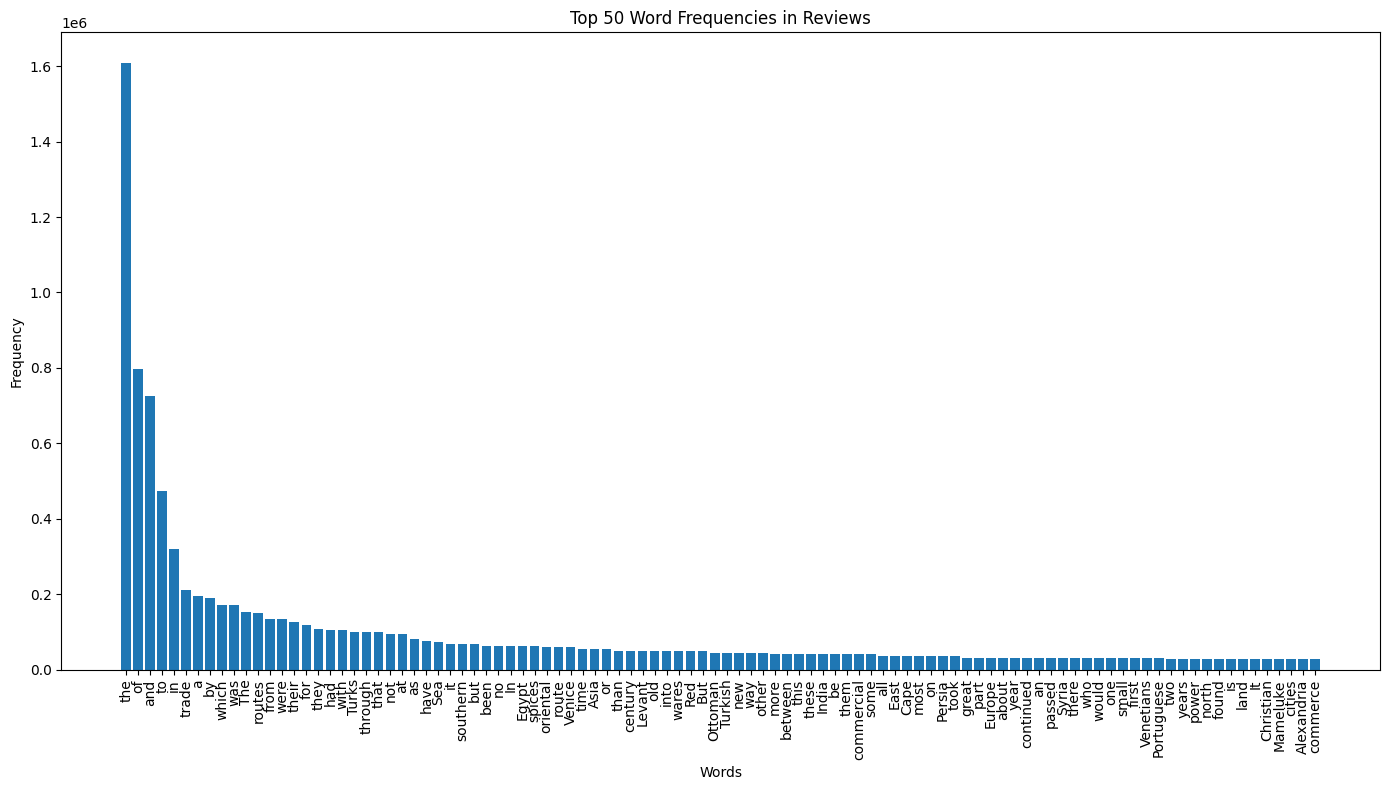

In [49]:
# Get the top 50 words and their frequencies
top_word_freq = word_freq.most_common(100)

# Separate the words and frequencies for plotting
top_words, top_frequencies = zip(*top_word_freq)

# Plot word frequencies for the top 50 words
plt.figure(figsize=(14, 8))
plt.bar(top_words, top_frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Word Frequencies in Reviews')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()


In [50]:
for token in doc:
    print(token, "|", token.pos_, "*****", spacy.explain(token.pos_), "***Token Tag: ", token.tag_, " *|* ", spacy.explain(token.tag_))

ï | X ***** other ***Token Tag:  LS  *|*  list item marker
» | NOUN ***** noun ***Token Tag:  NNS  *|*  noun, plural
¿ | PROPN ***** proper noun ***Token Tag:  NNP  *|*  noun, proper singular









 | SPACE ***** space ***Token Tag:  _SP  *|*  whitespace
_ | PUNCT ***** punctuation ***Token Tag:  NFP  *|*  superfluous punctuation
The | DET ***** determiner ***Token Tag:  DT  *|*  determiner
Ottoman | PROPN ***** proper noun ***Token Tag:  NNP  *|*  noun, proper singular
Turks | PROPN ***** proper noun ***Token Tag:  NNPS  *|*  noun, proper plural
and | CCONJ ***** coordinating conjunction ***Token Tag:  CC  *|*  conjunction, coordinating
the | DET ***** determiner ***Token Tag:  DT  *|*  determiner
Routes | PROPN ***** proper noun ***Token Tag:  NNPS  *|*  noun, proper plural
of | ADP ***** adposition ***Token Tag:  IN  *|*  conjunction, subordinating or preposition
Oriental | PROPN ***** proper noun ***Token Tag:  NNP  *|*  noun, proper singular
Trade | PROPN ***** proper noun ***T

In [51]:
for token in doc:
    if token.pos_ in ["NOUN", "PROPN"]:
        print(token, " | ", token.pos_, " | ", spacy.explain(token.pos_))

»  |  NOUN  |  noun
¿  |  PROPN  |  proper noun
Ottoman  |  PROPN  |  proper noun
Turks  |  PROPN  |  proper noun
Routes  |  PROPN  |  proper noun
Oriental  |  PROPN  |  proper noun
Trade  |  PROPN  |  proper noun
_  |  NOUN  |  noun
period  |  NOUN  |  noun
years  |  NOUN  |  noun
close  |  NOUN  |  noun
century  |  NOUN  |  noun
decade  |  NOUN  |  noun
sixteenth  |  NOUN  |  noun
power  |  NOUN  |  noun
Ottoman  |  PROPN  |  proper noun
Turks  |  PROPN  |  proper noun
area  |  NOUN  |  noun
control  |  NOUN  |  noun
holdings  |  NOUN  |  noun
north  |  NOUN  |  noun
Levant  |  PROPN  |  proper noun
steppes  |  NOUN  |  noun
desert  |  NOUN  |  noun
lands  |  NOUN  |  noun
routes  |  NOUN  |  noun
times  |  NOUN  |  noun
trade  |  NOUN  |  noun
East  |  PROPN  |  proper noun
West  |  PROPN  |  proper noun
time  |  NOUN  |  noun
control  |  NOUN  |  noun
way  |  NOUN  |  noun
Africa  |  PROPN  |  proper noun
years  |  NOUN  |  noun
part  |  NOUN  |  noun
trade  |  NOUN  |  noun
Europe

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 [Text(0, 0, 'trade'),
  Text(1, 0, 'routes'),
  Text(2, 0, 'Turks'),
  Text(3, 0, 'Sea'),
  Text(4, 0, 'Egypt'),
  Text(5, 0, 'spices'),
  Text(6, 0, 'route'),
  Text(7, 0, 'Venice'),
  Text(8, 0, 'time'),
  Text(9, 0, 'Asia'),
  Text(10, 0, 'century'),
  Text(11, 0, 'wares'),
  Text(12, 0, 'Red'),
  Text(13, 0, 'Ottoman'),
  Text(14, 0, 'way'),
  Text(15, 0, 'Levant'),
  Text(16, 0, 'India'),
  Text(17, 0, 'East'),
  Text(18, 0, 'Cape'),
  Text(19, 0, 'Persia'),
  Text(20, 0, 'part'),
  Text(21, 0, 'Europe'),
  Text(22, 0, 'year'),
  Text(23, 0, 'Syria'),
  Text(24, 0, 'Venetians'),
  Text(25, 0, 'years'),
  Text(26, 0, 'power'),
  Text(27, 0, 'land'),
  Text(28, 0, 'cities'),
  Text(29, 0, 'Alexandria'),
  Text(30, 0, 'commerce'),
  Text(31, 0, 'Portuguese'),
 

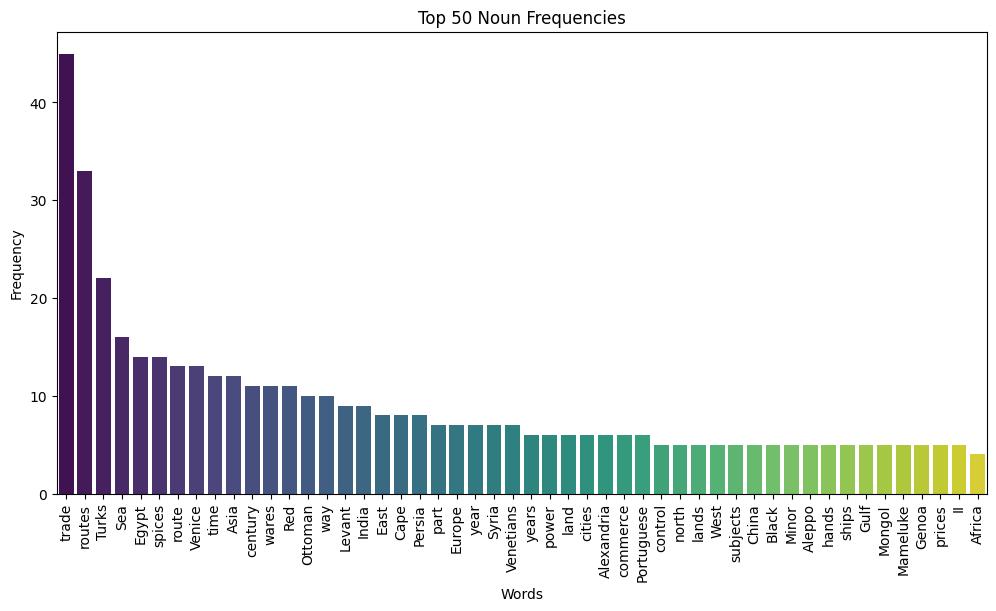

In [52]:

# Get common nouns and proper nouns
nouns = [token.text for token in doc if token.pos_ in ["NOUN", "PROPN"]]
word_freq = Counter(nouns)

top_50_nouns = word_freq.most_common(50)

# Separate the words and frequencies for plotting
all_words, all_frequencies = zip(*top_50_nouns)


plt.figure(figsize=(12, 6))
sns.barplot(x=list(all_words), y=list(all_frequencies), palette="viridis")
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 50 Noun Frequencies')
plt.xticks(rotation=90)  

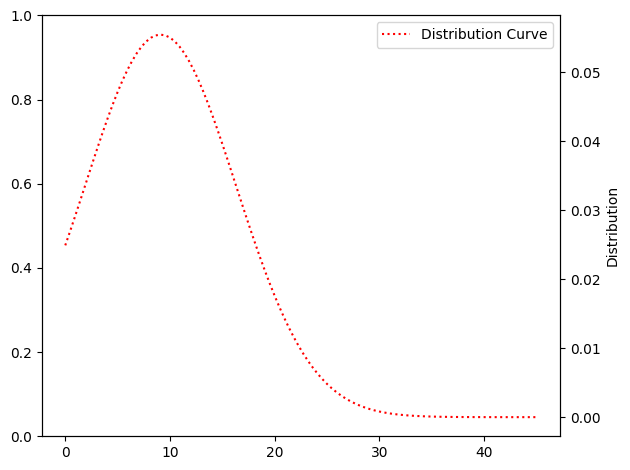

In [53]:
# distribution curve using the frequencies
mu, std = np.mean(list(all_frequencies)), np.std(list(all_frequencies))
x = np.linspace(0, max(list(all_frequencies)), 100)
p = norm.pdf(x, mu, std)
plt.twinx()  
plt.plot(x, p, color='red', linestyle='dotted', label='Distribution Curve')
plt.ylabel('Distribution')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In [54]:
filtered_tokens = []

for token in doc:
    if token.pos_ not in ["SPACE", "X", "PUNCT"]:
        filtered_tokens.append(token)

print(filtered_tokens)

[», ¿, The, Ottoman, Turks, and, the, Routes, of, Oriental, Trade, _, Within, a, period, of, a, little, more, than, two, hundred, years, from, the, close, of, the, thirteenth, century, to, the, second, decade, of, the, sixteenth, the, rising, power, of, the, Ottoman, Turks, extended, the, area, of, its, political, control, until, its, holdings, stretched, north, and, south, across, the, Levant, from, the, Russian, steppes, to, the, Sudanese, desert, The, Turkish, lands, thus, came, to, intercept, all, the, great, routes, which, in, ancient, and, medieval, times, had, borne, the, trade, between, East, and, West, Near, the, time, when, the, Turkish, control, became, complete, a, new, way, was, discovered, passing, around, Africa, and, within, a, few, years, the, larger, part, of, the, through, trade, between, Europe, and, Asia, had, deserted, the, Levantine, routes, and, begun, to, follow, that, round, the, Cape, of, Good, Hope, The, causes, of, this, diversion, of, trade, have, not, bee

In [55]:
for ent in doc.ents:
    print(ent.text, "|", ent.label_, spacy.explain(ent.label_))

The Ottoman Turks | NORP Nationalities or religious or political groups
the Routes of Oriental Trade | GPE Countries, cities, states
a little more than two hundred years | DATE Absolute or relative dates or periods
the thirteenth century | DATE Absolute or relative dates or periods
the second decade of the sixteenth | DATE Absolute or relative dates or periods
the Ottoman Turks | NORP Nationalities or religious or political groups
Levant | PERSON People, including fictional
Russian | NORP Nationalities or religious or political groups
Sudanese | NORP Nationalities or religious or political groups
Turkish | NORP Nationalities or religious or political groups
East | LOC Non-GPE locations, mountain ranges, bodies of water
West | LOC Non-GPE locations, mountain ranges, bodies of water
Turkish | NORP Nationalities or religious or political groups
Africa | LOC Non-GPE locations, mountain ranges, bodies of water
a few years | DATE Absolute or relative dates or periods
Europe | LOC Non-GPE loc

In [56]:
# Extract entities and their types
entity_data = [(ent.text, ent.label_) for ent in doc.ents]

# Count the frequency of each entity type
entity_type_counts = Counter(entity_data)

# Extract entity types and their corresponding counts
types = [entity_type for entity_type, _ in entity_type_counts.keys()]
counts = list(entity_type_counts.values())

types, count = zip(*entity_type_counts.items())
types, count = zip(*sorted(zip(types, counts), key=lambda x: x[1], reverse=True))

mean_count = np.mean(counts)
median_count = np.median(counts)
std_deviation = np.std(counts)


print("Mean Count:", mean_count)
print("Median Count:", median_count)
print("Standard Deviation:", std_deviation)

Mean Count: 2.1333333333333333
Median Count: 1.0
Standard Deviation: 2.4853760313268527


In [57]:
words = doc.text.lower().split()
vocabulary = list(set(words))

words

['ï»¿',
 '_the',
 'ottoman',
 'turks',
 'and',
 'the',
 'routes',
 'of',
 'oriental',
 'trade_',
 'within',
 'a',
 'period',
 'of',
 'a',
 'little',
 'more',
 'than',
 'two',
 'hundred',
 'years,',
 'from',
 'the',
 'close',
 'of',
 'the',
 'thirteenth',
 'century',
 'to',
 'the',
 'second',
 'decade',
 'of',
 'the',
 'sixteenth,',
 'the',
 'rising',
 'power',
 'of',
 'the',
 'ottoman',
 'turks',
 'extended',
 'the',
 'area',
 'of',
 'its',
 'political',
 'control',
 'until',
 'its',
 'holdings',
 'stretched',
 'north',
 'and',
 'south',
 'across',
 'the',
 'levant',
 'from',
 'the',
 'russian',
 'steppes',
 'to',
 'the',
 'sudanese',
 'desert.',
 'the',
 'turkish',
 'lands',
 'thus',
 'came',
 'to',
 'intercept',
 'all',
 'the',
 'great',
 'routes',
 'which',
 'in',
 'ancient',
 'and',
 'medieval',
 'times',
 'had',
 'borne',
 'the',
 'trade',
 'between',
 'east',
 'and',
 'west.',
 'near',
 'the',
 'time',
 'when',
 'the',
 'turkish',
 'control',
 'became',
 'complete,',
 'a',
 'new'

In [58]:
word_to_index = {word: i for i, word in enumerate(vocabulary)}
print(word_to_index)

{'after': 0, 'both': 1, 'protect': 2, 'spices,': 3, 'termed': 4, 'portuguese.': 5, 'vessel': 6, 'increase': 7, 'comparatively': 8, 'haulâ\x80\x99': 9, 'lucrative': 10, 'interfered': 11, 'attack': 12, 'some': 13, 'slight': 14, 'first': 15, 'agents': 16, 'pope': 17, 'turkoman': 18, 'that': 19, 'empire': 20, 'would': 21, 'anarchy': 22, 'sixteenth': 23, 'misconceived.': 24, 'able': 25, 'no': 26, 'lay': 27, 'southern,': 28, 'negotiations': 29, 'subjects': 30, 'thence': 31, 'officials,': 32, 'shipping': 33, 'organizing': 34, 'grasping': 35, 'alone': 36, 'also,': 37, 'caspian': 38, 'quarter': 39, 'nourished': 40, 'galleys': 41, 'wares.': 42, 'granted': 43, 'trade.': 44, 'disturbance': 45, 'bagdad.': 46, 'quite': 47, 'helped': 48, 'permanently': 49, 'stability': 50, 'mace,': 51, 'class': 52, 'military': 53, 'diverged': 54, 'arabian': 55, 'new.': 56, 'genoa': 57, 'sanuto': 58, 'century,': 59, 'cheaper,': 60, 'alexandria.[42]': 61, 'columbus': 62, 'plundered': 63, 'fewer': 64, 'fallen': 65, 'beg

In [59]:
def one_hot_encoding(word, word_to_index):
    one_hot_vector = np.zeros(len(word_to_index))
    
    if word in word_to_index:
        index = word_to_index[word]
        one_hot_vector[index] = 1
        
    return one_hot_vector

encoded_text = [one_hot_encoding(word, word_to_index) for word in words]


print("Text:", text)

Text: ï»¿








_The Ottoman Turks and the Routes of Oriental Trade_


Within a period of a little more than two hundred years, from the close
of the thirteenth century to the second decade of the sixteenth, the
rising power of the Ottoman Turks extended the area of its political
control until its holdings stretched north and south across the Levant
from the Russian steppes to the Sudanese desert. The Turkish lands thus
came to intercept all the great routes which in ancient and medieval
times had borne the trade between East and West. Near the time when
the Turkish control became complete, a new way was discovered, passing
around Africa; and within a few years the larger part of the through
trade between Europe and Asia had deserted the Levantine routes and
begun to follow that round the Cape of Good Hope. The causes of this
diversion of trade have not been fully agreed upon. No specific
investigation of the subject appears to have been made. A glance
through works which, being main

In [60]:
print("\nWord to Index Mapping:", word_to_index)


Word to Index Mapping: {'after': 0, 'both': 1, 'protect': 2, 'spices,': 3, 'termed': 4, 'portuguese.': 5, 'vessel': 6, 'increase': 7, 'comparatively': 8, 'haulâ\x80\x99': 9, 'lucrative': 10, 'interfered': 11, 'attack': 12, 'some': 13, 'slight': 14, 'first': 15, 'agents': 16, 'pope': 17, 'turkoman': 18, 'that': 19, 'empire': 20, 'would': 21, 'anarchy': 22, 'sixteenth': 23, 'misconceived.': 24, 'able': 25, 'no': 26, 'lay': 27, 'southern,': 28, 'negotiations': 29, 'subjects': 30, 'thence': 31, 'officials,': 32, 'shipping': 33, 'organizing': 34, 'grasping': 35, 'alone': 36, 'also,': 37, 'caspian': 38, 'quarter': 39, 'nourished': 40, 'galleys': 41, 'wares.': 42, 'granted': 43, 'trade.': 44, 'disturbance': 45, 'bagdad.': 46, 'quite': 47, 'helped': 48, 'permanently': 49, 'stability': 50, 'mace,': 51, 'class': 52, 'military': 53, 'diverged': 54, 'arabian': 55, 'new.': 56, 'genoa': 57, 'sanuto': 58, 'century,': 59, 'cheaper,': 60, 'alexandria.[42]': 61, 'columbus': 62, 'plundered': 63, 'fewer'

In [61]:
print("\nOne-Hot Encoded Text:")
for word, encoding in zip(words, encoded_text):
    print(f"{word}: {encoding}") 


One-Hot Encoded Text:
ï»¿: [0. 0. 0. ... 0. 0. 0.]
_the: [0. 0. 0. ... 0. 0. 0.]
ottoman: [0. 0. 0. ... 0. 0. 0.]
turks: [0. 0. 0. ... 0. 0. 0.]
and: [0. 0. 0. ... 0. 0. 0.]
the: [0. 0. 0. ... 0. 0. 0.]
routes: [0. 0. 0. ... 0. 0. 0.]
of: [0. 0. 0. ... 0. 0. 0.]
oriental: [0. 0. 0. ... 0. 0. 0.]
trade_: [0. 0. 0. ... 0. 0. 0.]
within: [0. 0. 0. ... 0. 0. 0.]
a: [0. 0. 0. ... 0. 0. 0.]
period: [0. 0. 0. ... 0. 0. 0.]
of: [0. 0. 0. ... 0. 0. 0.]
a: [0. 0. 0. ... 0. 0. 0.]
little: [0. 0. 0. ... 0. 0. 0.]
more: [0. 0. 0. ... 0. 0. 0.]
than: [0. 0. 0. ... 0. 0. 0.]
two: [0. 0. 0. ... 0. 0. 0.]
hundred: [0. 0. 0. ... 0. 0. 0.]
years,: [0. 0. 0. ... 0. 0. 0.]
from: [0. 0. 0. ... 0. 0. 0.]
the: [0. 0. 0. ... 0. 0. 0.]
close: [0. 0. 0. ... 0. 0. 0.]
of: [0. 0. 0. ... 0. 0. 0.]
the: [0. 0. 0. ... 0. 0. 0.]
thirteenth: [0. 0. 0. ... 0. 0. 0.]
century: [0. 0. 0. ... 0. 0. 0.]
to: [0. 0. 0. ... 0. 0. 0.]
the: [0. 0. 0. ... 0. 0. 0.]
second: [0. 0. 0. ... 0. 0. 0.]
decade: [0. 0. 0. ... 0. 0. 0.]
o

In [62]:
entities = [(ent.text, ent.label_) for ent in doc.ents]
entity_texts, entity_labels = zip(* entities)

label_encoder = LabelEncoder()

encoded_entity_labels = label_encoder.fit_transform(entity_labels)

for entity, label, encoded_label in zip(entity_texts, entity_labels, encoded_entity_labels):
    print(f"Entity: {entity}\tLabel: {label}\tEncoded Label: {encoded_label}")
    

Entity: The Ottoman Turks	Label: NORP	Encoded Label: 7
Entity: the Routes of Oriental Trade	Label: GPE	Encoded Label: 3
Entity: a little more than two hundred years	Label: DATE	Encoded Label: 1
Entity: the thirteenth century	Label: DATE	Encoded Label: 1
Entity: the second decade of the sixteenth	Label: DATE	Encoded Label: 1
Entity: the Ottoman Turks	Label: NORP	Encoded Label: 7
Entity: Levant	Label: PERSON	Encoded Label: 10
Entity: Russian	Label: NORP	Encoded Label: 7
Entity: Sudanese	Label: NORP	Encoded Label: 7
Entity: Turkish	Label: NORP	Encoded Label: 7
Entity: East	Label: LOC	Encoded Label: 5
Entity: West	Label: LOC	Encoded Label: 5
Entity: Turkish	Label: NORP	Encoded Label: 7
Entity: Africa	Label: LOC	Encoded Label: 5
Entity: a few years	Label: DATE	Encoded Label: 1
Entity: Europe	Label: LOC	Encoded Label: 5
Entity: Asia	Label: LOC	Encoded Label: 5
Entity: Levantine	Label: PERSON	Encoded Label: 10
Entity: the Cape of Good Hope	Label: LOC	Encoded Label: 5
Entity: about the
year 15

In [63]:
# Extract entities and their types
entities = [(ent.text, ent.label_) for ent in doc.ents]

# Encode entity labels using LabelEncoder
entity_texts, entity_labels = zip(*entities)
label_encoder = LabelEncoder()
encoded_entity_labels = label_encoder.fit_transform(entity_labels)


entity_label_mapping = {entity: encoded_label for entity, encoded_label in zip(entity_texts, encoded_entity_labels)}
person_entities = [entity for entity, label in zip(entity_texts, entity_labels) if label == 'PERSON']
person_entity_counts = Counter(person_entities)



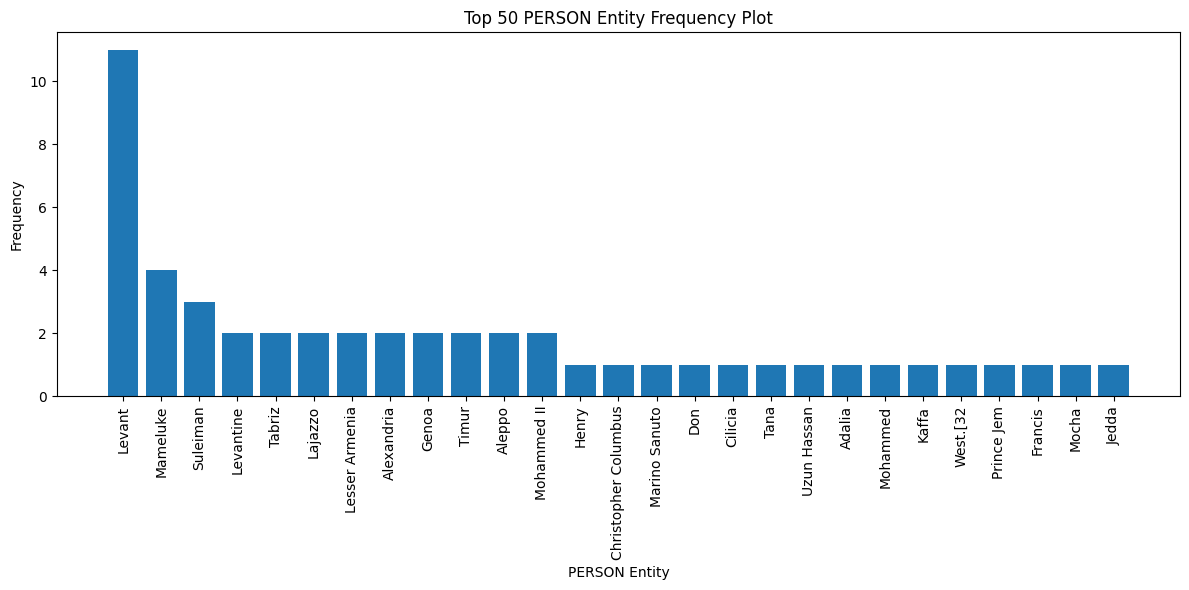

In [64]:
top_50_person_entities = person_entity_counts.most_common(50)

person_entity_texts, person_entity_counts = zip(*top_50_person_entities)

plt.figure(figsize=(12, 6))
plt.bar(person_entity_texts, person_entity_counts)
plt.xlabel("PERSON Entity")
plt.ylabel("Frequency")
plt.title("Top 50 PERSON Entity Frequency Plot")
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

In [65]:
# Count the frequency of each PERSON entity
person_entity_counts = Counter(person_entities)

person_entity_counts

Counter({'Levant': 11,
         'Levantine': 2,
         'Henry': 1,
         'Christopher Columbus': 1,
         'Marino Sanuto': 1,
         'Don': 1,
         'Tabriz': 2,
         'Lajazzo': 2,
         'Lesser Armenia': 2,
         'Mameluke': 4,
         'Alexandria': 2,
         'Cilicia': 1,
         'Tana': 1,
         'Genoa': 2,
         'Timur': 2,
         'Aleppo': 2,
         'Mohammed II': 2,
         'Uzun Hassan': 1,
         'Adalia': 1,
         'Mohammed': 1,
         'Kaffa': 1,
         'West.[32': 1,
         'Prince Jem': 1,
         'Francis': 1,
         'Suleiman': 3,
         'Mocha': 1,
         'Jedda': 1})

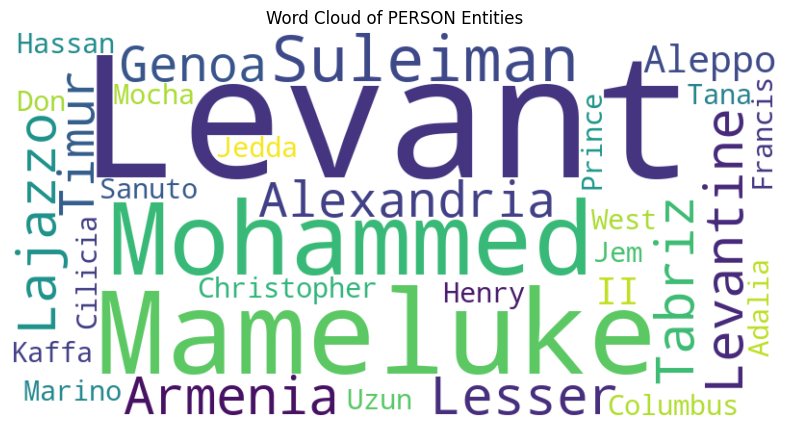

In [66]:
# Join the PERSON entities into a single string separated by spaces
person_entities_text = " ".join(person_entities)

wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis")

wordcloud.generate(person_entities_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of PERSON Entities")
plt.show()

In [ ]:
# Going to Extract the Countries Names and Analyzing it's frequency with Wordcloud

In [73]:
countries_entity = [(ent.text, ent.label_) for ent in doc.ents if ent.label_ == "GPE"]
countries_entity_counts = Counter(countries_entity)
print(countries_entity_counts)

Counter({('Egypt', 'GPE'): 14, ('Venice', 'GPE'): 13, ('India', 'GPE'): 9, ('Persia', 'GPE'): 8, ('Syria', 'GPE'): 7, ('China', 'GPE'): 5, ('Bagdad', 'GPE'): 4, ('Alexandria', 'GPE'): 4, ('Trebizond', 'GPE'): 3, ('Portugal', 'GPE'): 2, ('Barcelona', 'GPE'): 2, ('Beirut', 'GPE'): 2, ('Lisbon', 'GPE'): 2, ('Turkey', 'GPE'): 2, ('Diu', 'GPE'): 2, ('Aden', 'GPE'): 2, ('Spain', 'GPE'): 2, ('the Routes of Oriental Trade', 'GPE'): 1, ('Tabriz', 'GPE'): 1, ('America', 'GPE'): 1, ('Tana', 'GPE'): 1, ('Kosseir', 'GPE'): 1, ('the Mongol Empire', 'GPE'): 1, ('Palestine', 'GPE'): 1, ('Florence', 'GPE'): 1, ('Ancona', 'GPE'): 1, ('Trebizond Mohammed II', 'GPE'): 1, ('Satalia', 'GPE'): 1, ('Crimea', 'GPE'): 1, ('Kaffa', 'GPE'): 1, ('Mecca', 'GPE'): 1, ('Mameluke', 'GPE'): 1, ('Arabia', 'GPE'): 1, ('North Africa', 'GPE'): 1, ('Gujarat', 'GPE'): 1, ('dislodge', 'GPE'): 1, ('Germany', 'GPE'): 1, ('Holland', 'GPE'): 1, ('France', 'GPE'): 1, ('Cairo', 'GPE'): 1})


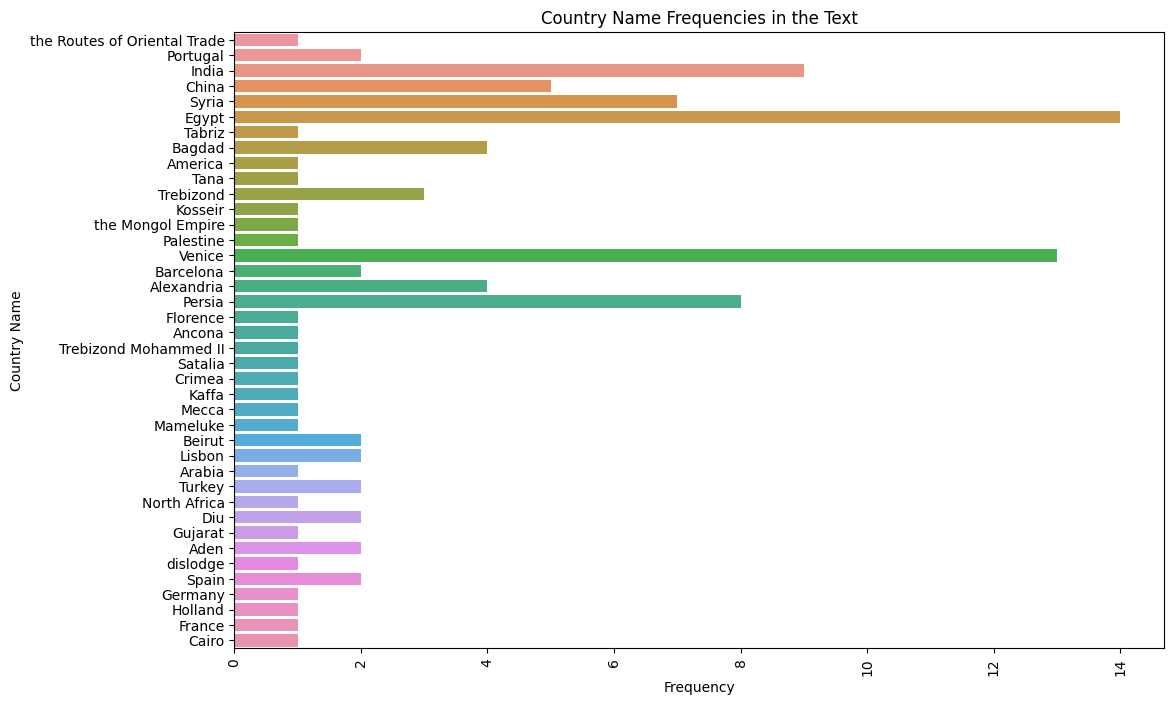

In [79]:
# Extract entities recognized as countries ("GPE")
country_entities = [ent.text for ent in doc.ents if ent.label_ == "GPE"]
country_entity_counts = Counter(country_entities)


country_names = list(country_entity_counts.keys())
counts = list(country_entity_counts.values())


plt.figure(figsize=(12, 8))
sns.barplot(x=counts, y=country_names, orient="h")
plt.xlabel("Frequency")
plt.ylabel("Country Name")
plt.title("Country Name Frequencies in the Text")
plt.xticks(rotation=90)
plt.show()

# Machine Learning Phase

In [127]:
with open("ottoman.txt", "r", encoding="utf-8") as file:
    text = file.read().splitlines()
    
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(text)

num_clusters = 2
kmeans = KMeans(n_clusters=num_clusters)
kmeans.fit(tfidf_matrix)

cluster_labels = kmeans.labels_

for i, label in enumerate(cluster_labels):
    print(f"Document {i} is in Cluster {label}")

Document 0 is in Cluster 0
Document 1 is in Cluster 0
Document 2 is in Cluster 0
Document 3 is in Cluster 0
Document 4 is in Cluster 0
Document 5 is in Cluster 0
Document 6 is in Cluster 0
Document 7 is in Cluster 0
Document 8 is in Cluster 0
Document 9 is in Cluster 1
Document 10 is in Cluster 0
Document 11 is in Cluster 0
Document 12 is in Cluster 1
Document 13 is in Cluster 1
Document 14 is in Cluster 1
Document 15 is in Cluster 1
Document 16 is in Cluster 1
Document 17 is in Cluster 1
Document 18 is in Cluster 1
Document 19 is in Cluster 0
Document 20 is in Cluster 1
Document 21 is in Cluster 1
Document 22 is in Cluster 1
Document 23 is in Cluster 0
Document 24 is in Cluster 1
Document 25 is in Cluster 0
Document 26 is in Cluster 1
Document 27 is in Cluster 1
Document 28 is in Cluster 1
Document 29 is in Cluster 1
Document 30 is in Cluster 1
Document 31 is in Cluster 1
Document 32 is in Cluster 1
Document 33 is in Cluster 1
Document 34 is in Cluster 1
Document 35 is in Cluster 1
Do

```
Essentially, this code is grouping similar documents (lines of text) from the "ottoman.txt" file into clusters based on their content using K-Means clustering. It's a way to identify patterns and similarities within the text data without any prior labeling or categorization. 
```

In [128]:
X_train, X_test, y_train, y_test = train_test_split(text, cluster_labels, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer()

X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

In [129]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_tfidf, y_train)

y_pred = knn.predict(X_test_tfidf)

In [130]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.47
Confusion Matrix:
[[35  0]
 [39  0]]


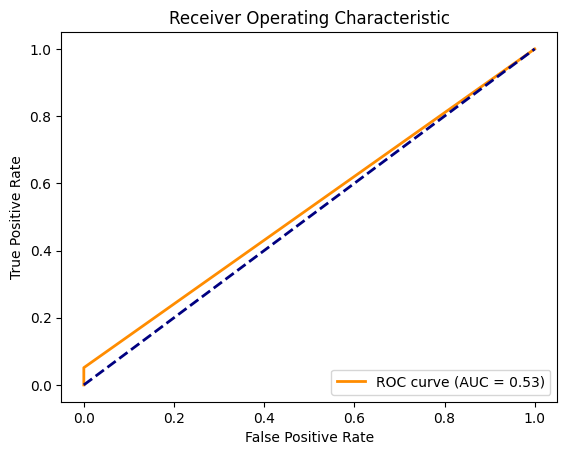

In [132]:
# ROC AUC Curve (Only applicable for binary classification)

if len(set(y_test)) == 2:
    y_scores = knn.predict_proba(X_test_tfidf)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    auc = roc_auc_score(y_test, y_scores)
    
    
    plt.figure()
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f'ROC curve (AUC = {auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic')
    plt.legend(loc='lower right')
    plt.show()

In [136]:
param_grids = {
    'n_neighbors': [3,5,7,9],
    'weights': ['uniform', 'distance'],
    'p': [1,2],  # 1 is manhattan distance and 2 is euclidean distance
}

knn = KNeighborsClassifier()
grid_search = GridSearchCV(knn, param_grids, cv=5) # 5-fold cross-validation

grid_search.fit(X_train_tfidf, y_train)

best_params = grid_search.best_params_
best_knn = grid_search.best_estimator_

y_pred = best_knn.predict(X_test_tfidf)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Best Hyperparameters: {best_params}")
print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)

Best Hyperparameters: {'n_neighbors': 3, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.47297297297297297
Confusion Matrix:
[[35  0]
 [39  0]]


In [138]:
# Create a pipeline with TfidfVectorizer and multiple classifiers
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer()),
    ('classifier', XGBClassifier()),
    # You can replace this with other classifiers
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)

Accuracy: 0.8243243243243243
Confusion Matrix:
[[27  8]
 [ 5 34]]


In [143]:
param_grid = {
    'classifier__n_estimators': [100, 200, 300],
    'classifier__max_depth': [3, 4, 5],
}

grid_search = GridSearchCV(pipeline, param_grid, cv=6, scoring='roc_auc')

grid_search.fit(X_train, y_train)

y_pred = grid_search.predict(X_test)


roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC-AUC: {roc_auc}")

print("Best Hyperparameters:")
print(grid_search.best_params_)

ROC-AUC: 0.832967032967033
Best Hyperparameters:
{'classifier__max_depth': 3, 'classifier__n_estimators': 100}


```
Specifically, it utilizes the Grid Search with Cross-Validation (GridSearchCV) technique to systematically explore and identify the most effective hyperparameters for a classification model, with a focus on an XGBoost classifier. The 'param_grid' dictionary defines a range of hyperparameter values to be considered. This GridSearchCV instance is configured for 5-fold cross-validation, which divides the training dataset into five subsets, allowing the model to be trained and evaluated multiple times.

The key objective of this process is to pinpoint the hyperparameters that produce the highest ROC-AUC (Receiver Operating Characteristic - Area Under the Curve) score. The ROC-AUC score is a widely-used metric for assessing binary classifiers, providing insights into the model's ability to distinguish between positive and negative classes. The results are then printed out, including the best hyperparameters and the ROC-AUC score. Ultimately, this method streamlines the intricate task of hyperparameter optimization, enhancing the model's predictive capabilities and generalizability to unseen data.

```

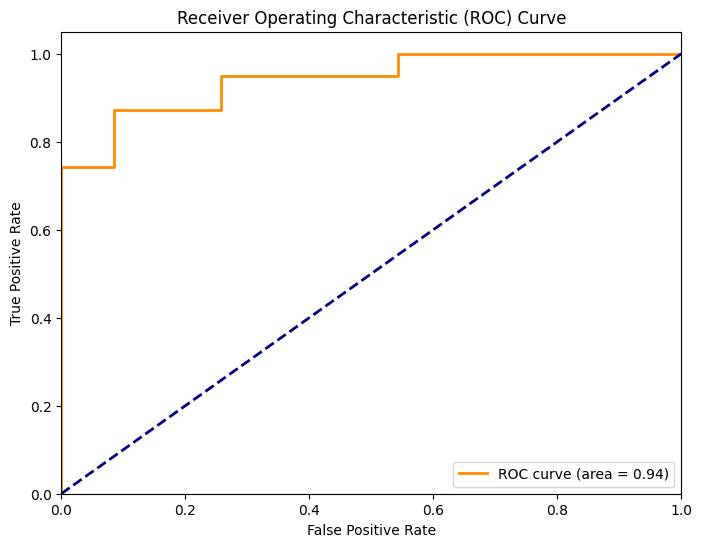

In [145]:
best_model = grid_search.best_estimator_
best_model.fit(X_train, y_train)

y_score = best_model.predict_proba(X_test)[:, 1]

fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


```
This code segment focuses on evaluating the performance of a binary classification model. It starts by selecting the best-performing model from a hyperparameter tuning process using GridSearchCV. Once the best model is identified, it is trained on the training data to prepare it for predictions. To assess the model's predictive accuracy, it computes the predicted probabilities for the positive class (class 1) in the test dataset.

The critical part of this code is the generation of a Receiver Operating Characteristic (ROC) curve and the calculation of the Area Under the Curve (AUC). The ROC curve is a graphical representation of the trade-off between the true positive rate (TPR) and the false positive rate (FPR) at different probability thresholds. A model's performance can be evaluated by examining how well it separates positive and negative instances. The AUC score quantifies this separation, with a higher AUC indicating better model performance.
```